In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

In [4]:
# Instantiate VGG16 model
#vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Normalize images
x_train_preprocess = tf.keras.applications.vgg16.preprocess_input(x_train_resized)
x_test_preprocess = tf.keras.applications.vgg16.preprocess_input(x_test_resized)

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

# classn layet on top
x=Flatten()(base_model.output)
x=Dense(units=128,activation='relu')(x)
x=Dense(units=10,activation='relu')(x)
prediction=Dense(units=10,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,978,360 (57.14 MB)

 Trainable params: 263,672 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# train the model
history = model.fit(x_train_preprocess,y_train,epochs=5,validation_data=(x_test_preprocess,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.3055 - loss: 1.9582 - val_accuracy: 0.5226 - val_loss: 1.3348
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.5925 - loss: 1.1664 - val_accuracy: 0.7113 - val_loss: 0.9233
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7579 - loss: 0.7453 - val_accuracy: 0.7430 - val_loss: 0.8011
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8057 - loss: 0.5741 - val_accuracy: 0.7547 - val_loss: 0.7736
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.8432 - loss: 0.4623 - val_accuracy: 0.7583 - val_loss: 0.8250


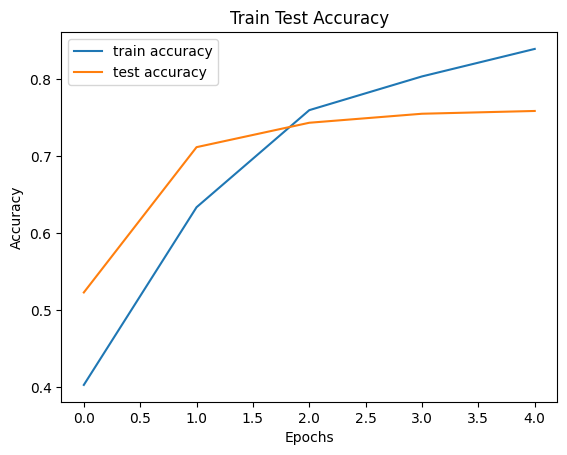

In [8]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Test Accuracy')
plt.legend()
plt.show()